<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [2]:
import os
import sys
import matplotlib.pyplot as plt

current_dir = os.path.dirname("./")
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip
from nomeroff_net.pipes.number_plate_classificators.options_detector import CLASS_REGION_ALL

/usr/local/lib/python3.13/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [22]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              # setup ocrs (presets key is detector file name in dir ./nomeroff_net/text_detectors/ )
                                              presets={
                                                "ae_efficientnet_b2": {
                                                    "for_regions": CLASS_REGION_ALL,
                                                    "for_count_lines": [1],
                                                    "model_path": "latest"
                                                },
                                                # "eu_2lines_efficientnet_b2": {
                                                #     "for_regions": CLASS_REGION_ALL,
                                                #     "for_count_lines": [2, 3],
                                                #     "model_path": "latest"
                                                # },
                                              },
                                              default_label="ae",
                                              default_lines_count=1,
                                              # if you not need detect region or count lines
                                              off_number_plate_classification=True,
                                              #path_to_classification_model="modelhub://numberplate_options_uacustom",
                                              image_loader="opencv")

In [23]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/29695759.jpg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/29695753.jpg'),
])

In [24]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['W52671'] [1]


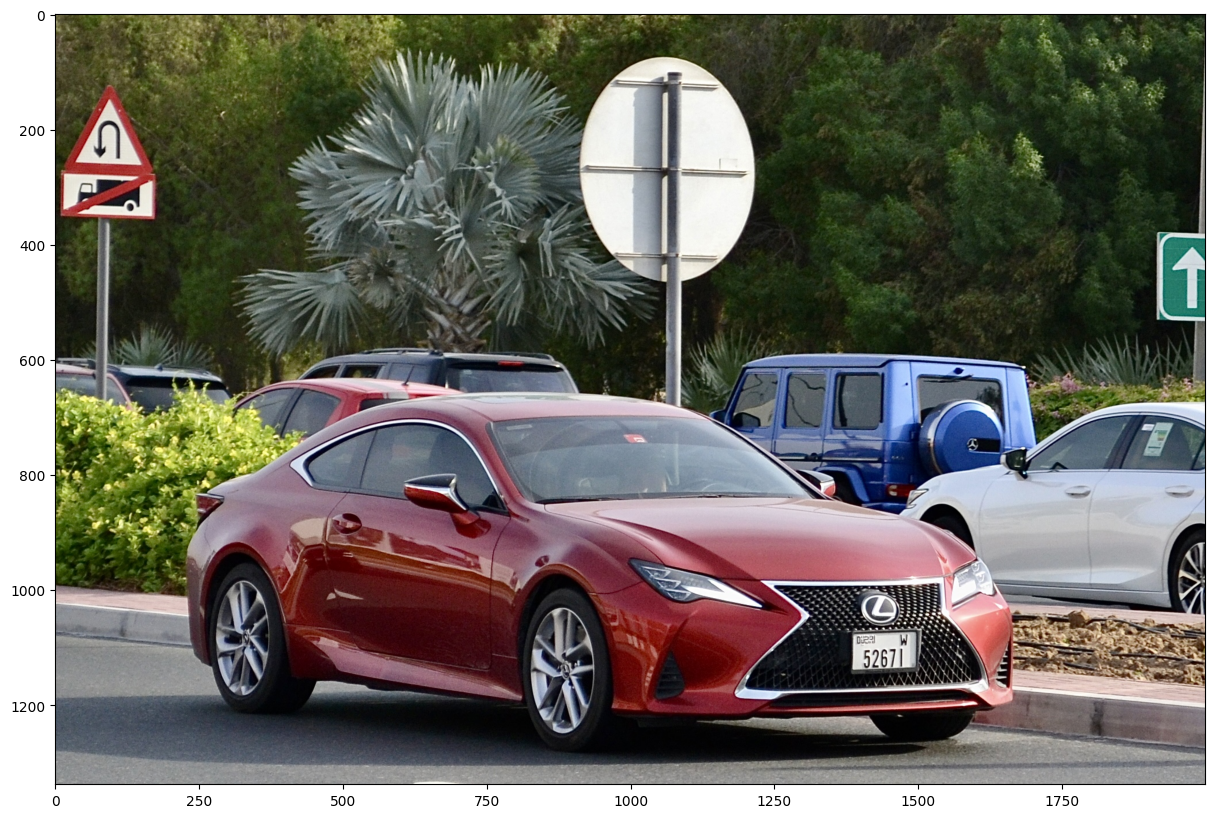

['G95476'] [1]


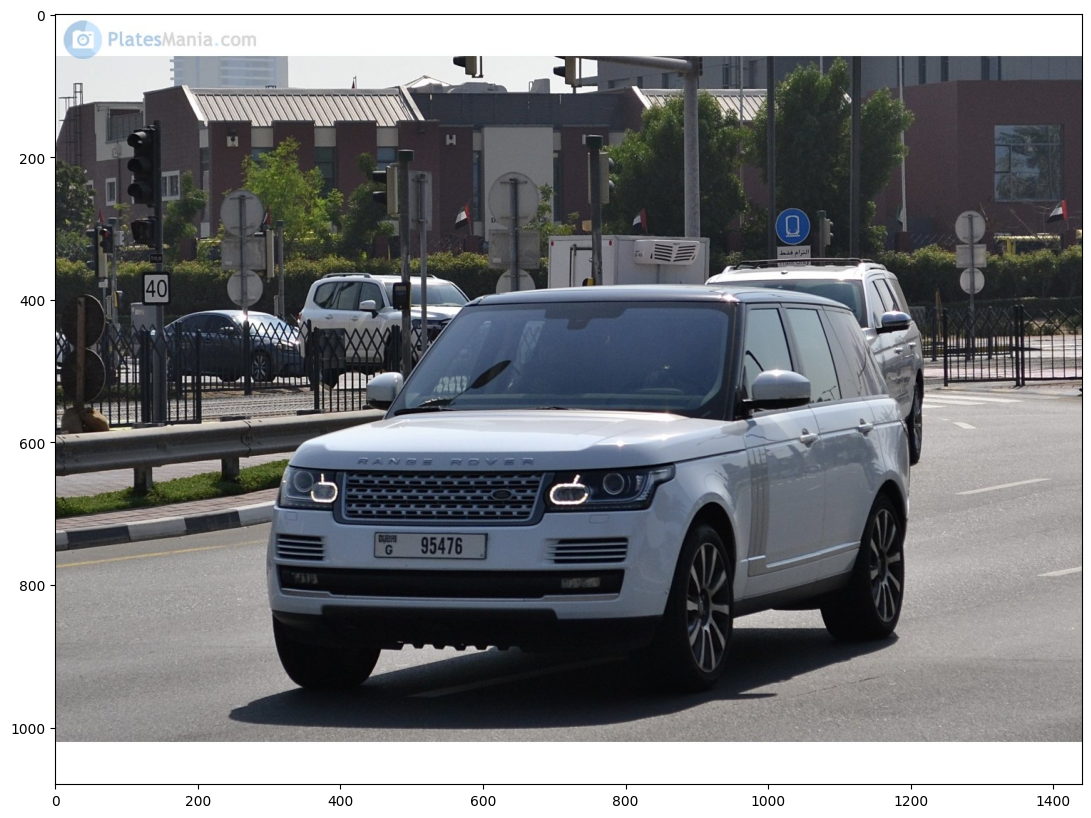

In [25]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np, cl in zip(images, texts, count_lines):
    print(np, cl)
    plt.imshow(img)
    plt.show()